In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv(r'C:\Users\ratpa\Desktop\ITVedant\ML\Datasets\bank.csv')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()        # the count of null values for each column

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df['age'].unique()          # Print unique values in the 'age' column

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [7]:
df['job'].unique() 

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [8]:
# Display the value counts for the 'job' column before filtering
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
# Filtering DataFrame to exclude rows where 'job' is 'unknown'
df = df[df['job'] != 'unknown']

In [10]:
# Display the value counts for the 'job' column after filtering
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [11]:
# One-hot encode the 'job' column
df = pd.get_dummies(df, columns=['job'])

In [12]:
df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,basic.4y,no,no,no,telephone,may,mon,261,...,0,0,1,0,0,0,0,0,0,0
1,57,married,high.school,unknown,no,no,telephone,may,mon,149,...,0,0,0,0,0,0,1,0,0,0
2,37,married,high.school,no,yes,no,telephone,may,mon,226,...,0,0,0,0,0,0,1,0,0,0
3,40,married,basic.6y,no,no,no,telephone,may,mon,151,...,0,0,0,0,0,0,0,0,0,0
4,56,married,high.school,no,no,yes,telephone,may,mon,307,...,0,0,0,0,0,0,1,0,0,0


In [13]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [14]:
df['marital'].value_counts()

married     24694
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

In [15]:
# Filtering DataFrame to exclude rows where 'marital' is 'unknown'
df = df[df['marital'] != 'unknown']

In [16]:
df['marital'].value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

In [17]:
# One-hot encode the 'marital' column
df = pd.get_dummies(df, columns=['marital'])

In [18]:
df.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,basic.4y,no,no,no,telephone,may,mon,261,1,...,0,0,0,0,0,0,0,0,1,0
1,57,high.school,unknown,no,no,telephone,may,mon,149,1,...,0,0,0,1,0,0,0,0,1,0
2,37,high.school,no,yes,no,telephone,may,mon,226,1,...,0,0,0,1,0,0,0,0,1,0
3,40,basic.6y,no,no,no,telephone,may,mon,151,1,...,0,0,0,0,0,0,0,0,1,0
4,56,high.school,no,no,yes,telephone,may,mon,307,1,...,0,0,0,1,0,0,0,0,1,0


In [19]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [20]:
df['education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: education, dtype: int64

In [21]:
# Filtering DataFrame to exclude rows where 'education' is 'unknown'
df = df[df['education'] != 'unknown']

In [22]:
df['education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
illiterate                18
Name: education, dtype: int64

In [23]:
# One-hot encode the 'education' column
df = pd.get_dummies(df, columns=['education'])

In [24]:
df.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,no,no,no,telephone,may,mon,261,1,999,...,0,1,0,1,0,0,0,0,0,0
1,57,unknown,no,no,telephone,may,mon,149,1,999,...,0,1,0,0,0,0,1,0,0,0
2,37,no,yes,no,telephone,may,mon,226,1,999,...,0,1,0,0,0,0,1,0,0,0
3,40,no,no,no,telephone,may,mon,151,1,999,...,0,1,0,0,1,0,0,0,0,0
4,56,no,no,yes,telephone,may,mon,307,1,999,...,0,1,0,0,0,0,1,0,0,0


In [25]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [26]:
df['default'].value_counts()

no         31224
unknown     7964
yes            3
Name: default, dtype: int64

In [27]:
# One-hot encode the 'default' column
df = pd.get_dummies(df, columns = ['default'])

In [28]:
df.head()

,age,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes
0,56,no,no,telephone,may,mon,261,1,999,0,...,1,0,0,0,0,0,0,1,0,0
1,57,no,no,telephone,may,mon,149,1,999,0,...,0,0,0,1,0,0,0,0,1,0
2,37,yes,no,telephone,may,mon,226,1,999,0,...,0,0,0,1,0,0,0,1,0,0
3,40,no,no,telephone,may,mon,151,1,999,0,...,0,1,0,0,0,0,0,1,0,0
4,56,no,yes,telephone,may,mon,307,1,999,0,...,0,0,0,1,0,0,0,1,0,0


In [29]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [30]:
df['housing'].value_counts()

yes        20578
no         17667
unknown      946
Name: housing, dtype: int64

In [31]:
# Filtering DataFrame to exclude rows where 'housing' is 'unknown'
df = df[df['housing'] != 'unknown']

In [32]:
df['housing'].value_counts()

yes    20578
no     17667
Name: housing, dtype: int64

In [33]:
# One-hot encode the 'housing' column
df = pd.get_dummies(df, columns = ['housing'])

In [34]:
df.head()

,age,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes
0,56,no,telephone,may,mon,261,1,999,0,nonexistent,...,0,0,0,0,0,1,0,0,1,0
1,57,no,telephone,may,mon,149,1,999,0,nonexistent,...,0,1,0,0,0,0,1,0,1,0
2,37,no,telephone,may,mon,226,1,999,0,nonexistent,...,0,1,0,0,0,1,0,0,0,1
3,40,no,telephone,may,mon,151,1,999,0,nonexistent,...,0,0,0,0,0,1,0,0,1,0
4,56,yes,telephone,may,mon,307,1,999,0,nonexistent,...,0,1,0,0,0,1,0,0,1,0


In [35]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
# One-hot encode the 'loan' column
df = pd.get_dummies(df, columns = ['loan'])

In [37]:
df.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,...,0,0,0,1,0,0,1,0,1,0
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,...,0,0,0,0,1,0,1,0,1,0
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,...,0,0,0,1,0,0,0,1,1,0
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,...,0,0,0,1,0,0,1,0,1,0
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,...,0,0,0,1,0,0,1,0,0,1


In [38]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  int64  
 1   contact                        38245 non-null  object 
 2   month                          38245 non-null  object 
 3   day_of_week                    38245 non-null  object 
 4   duration                       38245 non-null  int64  
 5   campaign                       38245 non-null  int64  
 6   pdays                          38245 non-null  int64  
 7   previous                       38245 non-null  int64  
 8   poutcome                       38245 non-null  object 
 9   emp.var.rate                   38245 non-null  float64
 10  cons.price.idx                 38245 non-null  float64
 11  cons.conf.idx                  38245 non-null  float64
 12  euribor3m                      38245 non-null 

In [40]:
cn = df.columns

In [41]:
cn

Index(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')

In [42]:
# reorder the columns
df = df.reindex(columns =['contact', 'month', 'day_of_week', 'poutcome', 'duration', 'campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'age','job_admin.','job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed', 'job_services','job_student', 'job_technician', 'job_unemployed', 'marital_divorced','marital_married', 'marital_single', 'education_basic.4y','education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate', 'education_professional.course','education_university.degree', 'default_no', 'default_unknown','default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'y'])

In [43]:
df.head()

,contact,month,day_of_week,poutcome,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,y
0,telephone,may,mon,nonexistent,261,1,999,0,1.1,93.994,...,0,0,1,0,0,1,0,1,0,no
1,telephone,may,mon,nonexistent,149,1,999,0,1.1,93.994,...,0,0,0,1,0,1,0,1,0,no
2,telephone,may,mon,nonexistent,226,1,999,0,1.1,93.994,...,0,0,1,0,0,0,1,1,0,no
3,telephone,may,mon,nonexistent,151,1,999,0,1.1,93.994,...,0,0,1,0,0,1,0,1,0,no
4,telephone,may,mon,nonexistent,307,1,999,0,1.1,93.994,...,0,0,1,0,0,1,0,0,1,no


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   contact                        38245 non-null  object 
 1   month                          38245 non-null  object 
 2   day_of_week                    38245 non-null  object 
 3   poutcome                       38245 non-null  object 
 4   duration                       38245 non-null  int64  
 5   campaign                       38245 non-null  int64  
 6   pdays                          38245 non-null  int64  
 7   previous                       38245 non-null  int64  
 8   emp.var.rate                   38245 non-null  float64
 9   cons.price.idx                 38245 non-null  float64
 10  cons.conf.idx                  38245 non-null  float64
 11  euribor3m                      38245 non-null  float64
 12  nr.employed                    38245 non-null 

<Axes: xlabel='y', ylabel='count'>

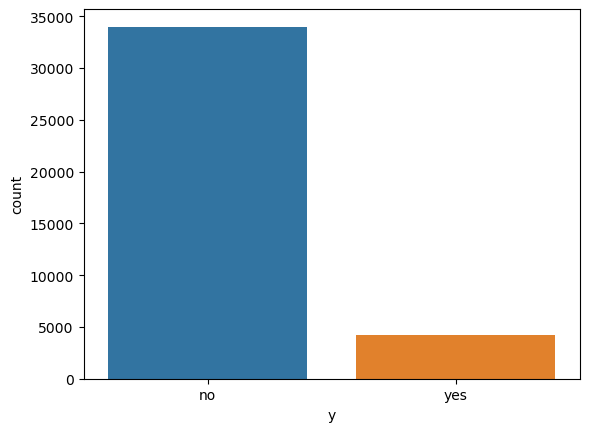

In [45]:
sns.countplot(df, x = df['y'])

In [46]:
corr = df.corr()       # Correlation matrix

In [47]:
corr

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,...,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes
duration,1.000000,-0.071110,-0.044278,0.016304,-0.025003,0.007530,-0.008656,-0.029029,-0.040722,0.002405,...,0.001551,-0.008690,-0.012868,0.009856,-0.009741,-0.005280,0.009104,-0.009104,-0.000280,0.000280
campaign,-0.071110,1.000000,0.051536,-0.078478,0.150752,0.128665,-0.010713,0.134783,0.143150,0.005519,...,-0.002265,0.002391,0.000235,-0.032297,0.032388,-0.003947,0.010817,-0.010817,-0.003914,0.003914
pdays,-0.044278,0.051536,1.000000,-0.581303,0.268705,0.080828,-0.090587,0.291953,0.366783,-0.038476,...,-0.002319,-0.003196,-0.041479,-0.077473,0.077447,0.001705,0.009370,-0.009370,-0.001874,0.001874
previous,0.016304,-0.078478,-0.581303,1.000000,-0.419647,-0.208783,-0.056856,-0.450672,-0.494617,0.028479,...,-0.002623,-0.007586,0.029190,0.098663,-0.098743,0.002969,-0.020837,0.020837,0.003268,-0.003268
emp.var.rate,-0.025003,0.150752,0.268705,-0.419647,1.000000,0.775418,0.211865,0.972422,0.907920,-0.003563,...,-0.002996,0.023046,-0.044461,-0.195513,0.195439,0.004622,0.060675,-0.060675,-0.002336,0.002336
cons.price.idx,0.007530,0.128665,0.080828,-0.208783,0.775418,1.000000,0.070521,0.689600,0.524272,-0.001236,...,-0.009525,-0.000833,-0.089365,-0.161581,0.161674,-0.003191,0.080849,-0.080849,0.003146,-0.003146
cons.conf.idx,-0.008656,-0.010713,-0.090587,-0.056856,0.211865,0.070521,1.000000,0.292641,0.115583,0.127644,...,0.002775,0.035280,0.080773,-0.026302,0.026201,0.004741,0.034437,-0.034437,0.012992,-0.012992
euribor3m,-0.029029,0.134783,0.291953,-0.450672,0.972422,0.689600,0.292641,1.000000,0.945336,0.007695,...,-0.001339,0.019901,-0.033226,-0.187277,0.187184,0.005476,0.059595,-0.059595,-0.000317,0.000317
nr.employed,-0.040722,0.143150,0.366783,-0.494617,0.907920,0.524272,0.115583,0.945336,1.000000,-0.021054,...,0.001314,0.015418,-0.035304,-0.182979,0.182870,0.006159,0.046513,-0.046513,-0.004088,0.004088
age,0.002405,0.005519,-0.038476,0.028479,-0.003563,-0.001236,0.127644,0.007695,-0.021054,1.000000,...,0.018219,0.008653,-0.063048,-0.160111,0.160087,0.002128,-0.000291,0.000291,0.006390,-0.006390


# Input Split

In [48]:
# Extracting features (x) and target variable (y) from DataFrame (df)
x = df.iloc[:,4:-1].values    
y = df.iloc[:,-1].values

# Model Training

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler() 

In [50]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [51]:
# standardize training and testing data using same scaler
X_train= st_x.fit_transform(x_train)   
X_test= st_x.transform(x_test) 

# 1) Using Support Vector Machine Algorithm

In [52]:
# Initialize the SVM classifier with a linear kernel with random state 0.
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [53]:
# Make predictions on the test set
y_pred= classifier.predict(X_test)

In [54]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_mat}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.90325532749379
Confusion Matrix:
[[6691  122]
 [ 618  218]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      6813
         yes       0.64      0.26      0.37       836

    accuracy                           0.90      7649
   macro avg       0.78      0.62      0.66      7649
weighted avg       0.89      0.90      0.88      7649



# 2) Using Random Forest Algorithm

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_mat}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9134527389201202
Confusion Matrix:
[[6593  220]
 [ 442  394]]
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      6813
         yes       0.64      0.47      0.54       836

    accuracy                           0.91      7649
   macro avg       0.79      0.72      0.75      7649
weighted avg       0.90      0.91      0.91      7649

